In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist
# x is images, y is labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# one input tensor , one output tensor
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])# this model is mainly for images
#returns logits- vector of raw predictions then given to normalization (multiclass->softmax)

predictions = model(x_train[:1]).numpy()
predictions


array([[ 0.7186096 , -0.14076898,  1.0019563 , -0.31813353, -0.269149  ,
        -0.3642111 , -0.11073256, -0.7227729 , -0.08718589, -0.31310138]],
      dtype=float32)

In [5]:
#logits->probabilities
tf.nn.softmax(predictions).numpy()

array([[0.188939  , 0.08000153, 0.2508289 , 0.06699923, 0.07036287,
        0.06398211, 0.08244094, 0.04470305, 0.08440518, 0.06733723]],
      dtype=float32)

In [6]:
#loss function - how well model is performing
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #Multiclass classification
loss_fn(y_train[:1], predictions).numpy()

2.698042

In [7]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
#optimizer adjusts weights, biases during training to get minimum loss


In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5318 - accuracy: 0.8113
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3991 - accuracy: 0.8554
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3668 - accuracy: 0.8662
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3464 - accuracy: 0.8722
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3295 - accuracy: 0.8792


In [9]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.3502 - accuracy: 0.8712 - 604ms/epoch - 2ms/step


[0.35018062591552734, 0.8712000250816345]

ReLU - used for most deep neural nets
Sigmoid-Binary classification 0,1 probab
Tanh- -1 to 1 middle is 0
Leaky ReLU- dead neurons
elu- handles negative values

Adam-wide range of tasks, especially when data is sparse or noisy.


## Basic classification: Classify images of clothing

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [12]:
# we have 10 labels so the output of model has 10 in dense
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

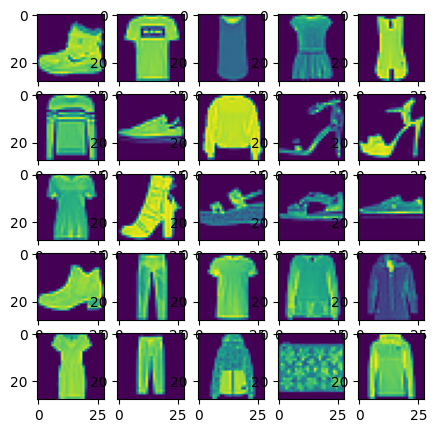

In [13]:
_, axs = plt.subplots(5, 5, figsize=(5,5))
axs = axs.flatten()
for img, ax in zip(x_train[:25], axs):
    ax.imshow(img)
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),#2dim array- 1D array
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5354 - accuracy: 0.8108
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4133 - accuracy: 0.8504
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3767 - accuracy: 0.8615
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3519 - accuracy: 0.8698
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3367 - accuracy: 0.8754
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3255 - accuracy: 0.8785
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3163 - accuracy: 0.8834
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3099 - accuracy: 0.8851
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3018 - accuracy: 0.8880
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.293

In [17]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc) # good since there is barely any overfitting

313/313 - 1s - loss: 0.3250 - accuracy: 0.8822 - 584ms/epoch - 2ms/step

Test accuracy: 0.8822000026702881


In [18]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
predictions[10]

array([2.7637391e-06, 5.6493459e-08, 9.8326556e-02, 7.6141538e-09,
       8.7882775e-01, 2.1248823e-08, 2.2842655e-02, 4.7040766e-10,
       1.6597953e-07, 1.1366558e-09], dtype=float32)

'Coat'

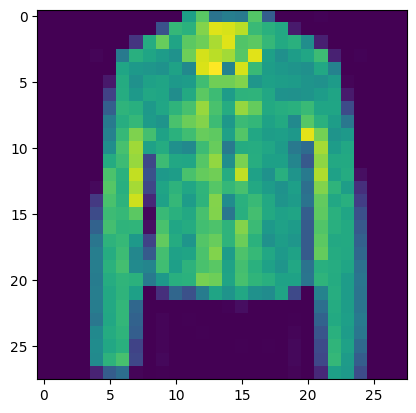

In [20]:
plt.imshow(x_test[10])
k=np.argmax(predictions[10])
class_names[k]

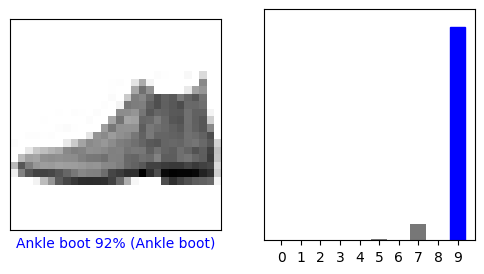

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test,x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()